In [ ]:
https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/
https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

#### IMPORT THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

#### IMPORT THE DATASET

In [2]:
dataset=pd.read_csv('C:/Users/Win 10/Documents/group4.csv')

In [3]:
dataset.columns

Index(['1', '2', '3', '4', 'title', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', 'description'],
      dtype='object')

In [4]:
dataset=dataset[['title','description']]
dataset.head()

,title,description
0,Nobody; OK to take it and work on it,user-ag mozilla/5 macintosh ppc mac os mach-o en-u rv b2 gecko/20060909 bonecho/2 b2 build identifi mozilla/5 macintosh ppc mac os mach-o en-u rv b2 gecko/20060909 bonecho/2 b2 font os version pin...
1,Nobody; OK to take it and work on it,user-ag mozilla/5 macintosh ppc mac os mach-o en-u rv b2 gecko/20060909 bonecho/2 b2 build identifi mozilla/5 macintosh ppc mac os mach-o en-u rv b2 gecko/20060909 bonecho/2 b2 hover button search...
2,Max Kanat-Alexander,messag txt tmpl throw error function displai html part messag strip html revers entiti xml-rpc email command line creat attach detail diff review v1 test work comment attach detail diff review v1 ...
3,Matthew (lilmatt) Willis,tree-wid broke talkback mac trunk bug gori detail ve file inform ad bug block releas blocking0 deal crasher code disagre blocker great fix crash calendar-specif code window linux talkback discuss ...
4,Nobody; OK to take it and work on it,user-ag mozilla/5 window window nt en-gb rv gecko/20060728 firefox/1 build identifi mozilla/5 window window nt en-u rv a1 gecko/20060909 calendar/0 a2 creat repeat event quot securitymail work quo...


In [5]:
dataset.shape

(10048, 2)

#### DATA-PREPROCESSING

In [6]:
preprocessing_dataset= dataset
preprocessing_dataset.iloc[:3]

,title,description
0,Nobody; OK to take it and work on it,user-ag mozilla/5 macintosh ppc mac os mach-o en-u rv b2 gecko/20060909 bonecho/2 b2 build identifi mozilla/5 macintosh ppc mac os mach-o en-u rv b2 gecko/20060909 bonecho/2 b2 font os version pin...
1,Nobody; OK to take it and work on it,user-ag mozilla/5 macintosh ppc mac os mach-o en-u rv b2 gecko/20060909 bonecho/2 b2 build identifi mozilla/5 macintosh ppc mac os mach-o en-u rv b2 gecko/20060909 bonecho/2 b2 hover button search...
2,Max Kanat-Alexander,messag txt tmpl throw error function displai html part messag strip html revers entiti xml-rpc email command line creat attach detail diff review v1 test work comment attach detail diff review v1 ...


##### LOWER-CASTING

In [7]:
preprocessing_dataset['clean_1'] = preprocessing_dataset['description'].apply(lambda x: x.lower())

In [8]:
preprocessing_dataset[['description','clean_1']].iloc[:3]

,description,clean_1
0,user-ag mozilla/5 macintosh ppc mac os mach-o en-u rv b2 gecko/20060909 bonecho/2 b2 build identifi mozilla/5 macintosh ppc mac os mach-o en-u rv b2 gecko/20060909 bonecho/2 b2 font os version pin...,user-ag mozilla/5 macintosh ppc mac os mach-o en-u rv b2 gecko/20060909 bonecho/2 b2 build identifi mozilla/5 macintosh ppc mac os mach-o en-u rv b2 gecko/20060909 bonecho/2 b2 font os version pin...
1,user-ag mozilla/5 macintosh ppc mac os mach-o en-u rv b2 gecko/20060909 bonecho/2 b2 build identifi mozilla/5 macintosh ppc mac os mach-o en-u rv b2 gecko/20060909 bonecho/2 b2 hover button search...,user-ag mozilla/5 macintosh ppc mac os mach-o en-u rv b2 gecko/20060909 bonecho/2 b2 build identifi mozilla/5 macintosh ppc mac os mach-o en-u rv b2 gecko/20060909 bonecho/2 b2 hover button search...
2,messag txt tmpl throw error function displai html part messag strip html revers entiti xml-rpc email command line creat attach detail diff review v1 test work comment attach detail diff review v1 ...,messag txt tmpl throw error function displai html part messag strip html revers entiti xml-rpc email command line creat attach detail diff review v1 test work comment attach detail diff review v1 ...


##### REMOVAL OF PUNCTUATION

In [9]:
preprocessing_dataset['clean_2'] = preprocessing_dataset['clean_1'].str.replace("[^a-zA-Z#]", " ")

In [10]:
preprocessing_dataset[['clean_1','clean_2']].iloc[:3]

,clean_1,clean_2
0,user-ag mozilla/5 macintosh ppc mac os mach-o en-u rv b2 gecko/20060909 bonecho/2 b2 build identifi mozilla/5 macintosh ppc mac os mach-o en-u rv b2 gecko/20060909 bonecho/2 b2 font os version pin...,user ag mozilla macintosh ppc mac os mach o en u rv b gecko bonecho b build identifi mozilla macintosh ppc mac os mach o en u rv b gecko bonecho b font os version pin...
1,user-ag mozilla/5 macintosh ppc mac os mach-o en-u rv b2 gecko/20060909 bonecho/2 b2 build identifi mozilla/5 macintosh ppc mac os mach-o en-u rv b2 gecko/20060909 bonecho/2 b2 hover button search...,user ag mozilla macintosh ppc mac os mach o en u rv b gecko bonecho b build identifi mozilla macintosh ppc mac os mach o en u rv b gecko bonecho b hover button search...
2,messag txt tmpl throw error function displai html part messag strip html revers entiti xml-rpc email command line creat attach detail diff review v1 test work comment attach detail diff review v1 ...,messag txt tmpl throw error function displai html part messag strip html revers entiti xml rpc email command line creat attach detail diff review v test work comment attach detail diff review v ...


##### REMOVE SHORT WORDS

In [11]:
preprocessing_dataset['clean_3'] = preprocessing_dataset['clean_2'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [12]:
preprocessing_dataset[['clean_2','clean_3']].iloc[:3]

,clean_2,clean_3
0,user ag mozilla macintosh ppc mac os mach o en u rv b gecko bonecho b build identifi mozilla macintosh ppc mac os mach o en u rv b gecko bonecho b font os version pin...,user mozilla macintosh mach gecko bonecho build identifi mozilla macintosh mach gecko bonecho font version pinstrip theme match browser element bookmark toolbar locat sidebar titl statu reproduc s...
1,user ag mozilla macintosh ppc mac os mach o en u rv b gecko bonecho b build identifi mozilla macintosh ppc mac os mach o en u rv b gecko bonecho b hover button search...,user mozilla macintosh mach gecko bonecho build identifi mozilla macintosh mach gecko bonecho hover button search highlight version magnifi glass misalign hover version shift imag reproduc step re...
2,messag txt tmpl throw error function displai html part messag strip html revers entiti xml rpc email command line creat attach detail diff review v test work comment attach detail diff review v ...,messag tmpl throw error function displai html part messag strip html revers entiti email command line creat attach detail diff review test work comment attach detail diff review index bugzilla tem...


##### REMOVAL OF STOPWORDS

In [13]:
# We must import NLTK to remove the stopword
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
STOPW = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPW])

[nltk_data] Downloading package stopwords to C:\Users\Win
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
preprocessing_dataset["clean_4"] = preprocessing_dataset["clean_3"].apply(lambda text: remove_stopwords(text))

In [15]:
preprocessing_dataset[['clean_3','clean_4']].iloc[:3]

,clean_3,clean_4
0,user mozilla macintosh mach gecko bonecho build identifi mozilla macintosh mach gecko bonecho font version pinstrip theme match browser element bookmark toolbar locat sidebar titl statu reproduc s...,user mozilla macintosh mach gecko bonecho build identifi mozilla macintosh mach gecko bonecho font version pinstrip theme match browser element bookmark toolbar locat sidebar titl statu reproduc s...
1,user mozilla macintosh mach gecko bonecho build identifi mozilla macintosh mach gecko bonecho hover button search highlight version magnifi glass misalign hover version shift imag reproduc step re...,user mozilla macintosh mach gecko bonecho build identifi mozilla macintosh mach gecko bonecho hover button search highlight version magnifi glass misalign hover version shift imag reproduc step re...
2,messag tmpl throw error function displai html part messag strip html revers entiti email command line creat attach detail diff review test work comment attach detail diff review index bugzilla tem...,messag tmpl throw error function displai html part messag strip html revers entiti email command line creat attach detail diff review test work comment attach detail diff review index bugzilla tem...


##### STEMING

In [16]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

In [17]:
preprocessing_dataset["clean_5"]=preprocessing_dataset["clean_4"].apply(lambda text: stem_words(text))

In [18]:
preprocessing_dataset[['clean_4','clean_5']].iloc[:3]

,clean_4,clean_5
0,user mozilla macintosh mach gecko bonecho build identifi mozilla macintosh mach gecko bonecho font version pinstrip theme match browser element bookmark toolbar locat sidebar titl statu reproduc s...,user mozilla macintosh mach gecko bonecho build identifi mozilla macintosh mach gecko bonecho font version pinstrip theme match browser element bookmark toolbar locat sidebar titl statu reproduc s...
1,user mozilla macintosh mach gecko bonecho build identifi mozilla macintosh mach gecko bonecho hover button search highlight version magnifi glass misalign hover version shift imag reproduc step re...,user mozilla macintosh mach gecko bonecho build identifi mozilla macintosh mach gecko bonecho hover button search highlight version magnifi glass misalign hover version shift imag reproduc step re...
2,messag tmpl throw error function displai html part messag strip html revers entiti email command line creat attach detail diff review test work comment attach detail diff review index bugzilla tem...,messag tmpl throw error function displai html part messag strip html rever entiti email command line creat attach detail diff review test work comment attach detail diff review index bugzilla temp...


##### COMPARISON BETWEEN INITIAL DESCRIPTION AND CLEAN_DESCRIPTION

In [19]:
preprocessing_dataset[['description','clean_5']].iloc[:5]

,description,clean_5
0,user-ag mozilla/5 macintosh ppc mac os mach-o en-u rv b2 gecko/20060909 bonecho/2 b2 build identifi mozilla/5 macintosh ppc mac os mach-o en-u rv b2 gecko/20060909 bonecho/2 b2 font os version pin...,user mozilla macintosh mach gecko bonecho build identifi mozilla macintosh mach gecko bonecho font version pinstrip theme match browser element bookmark toolbar locat sidebar titl statu reproduc s...
1,user-ag mozilla/5 macintosh ppc mac os mach-o en-u rv b2 gecko/20060909 bonecho/2 b2 build identifi mozilla/5 macintosh ppc mac os mach-o en-u rv b2 gecko/20060909 bonecho/2 b2 hover button search...,user mozilla macintosh mach gecko bonecho build identifi mozilla macintosh mach gecko bonecho hover button search highlight version magnifi glass misalign hover version shift imag reproduc step re...
2,messag txt tmpl throw error function displai html part messag strip html revers entiti xml-rpc email command line creat attach detail diff review v1 test work comment attach detail diff review v1 ...,messag tmpl throw error function displai html part messag strip html rever entiti email command line creat attach detail diff review test work comment attach detail diff review index bugzilla temp...
3,tree-wid broke talkback mac trunk bug gori detail ve file inform ad bug block releas blocking0 deal crasher code disagre blocker great fix crash calendar-specif code window linux talkback discuss ...,tree broke talkback trunk gori detail file inform block relea block deal crasher code disagr blocker great crash calendar specif code window linux talkback discuss tomorrow block discuss matt checkin
4,user-ag mozilla/5 window window nt en-gb rv gecko/20060728 firefox/1 build identifi mozilla/5 window window nt en-u rv a1 gecko/20060909 calendar/0 a2 creat repeat event quot securitymail work quo...,user mozilla window window gecko firefox build identifi mozilla window window gecko calendar creat repeat event quot securitymail work quot weekli repeat mondai wednesdai thursdai sept sept catago...


#### TERM-DOCUMENT MATRIX

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vectorizer = TfidfVectorizer(stop_words='english', max_features= 2000, max_df = 0.5, smooth_idf=True)

In [22]:
doc_term_matrix = vectorizer.fit_transform(preprocessing_dataset['clean_5'])

In [23]:
doc_term_matrix.shape

(10048, 2000)

#### FIND OPTIMAL TOPICS USING EXPLAINED VARIANCE RATIO

In [25]:
from sklearn.decomposition import TruncatedSVD

In [26]:
# Program to find the optimal number of components for Truncated SVD
n_comp = [5,15,30, 60, 90, 180, 250,350,500,800,1000] # list containing different values of components
explained = [] # explained variance ratio for each component of Truncated SVD
for x in n_comp:
    svd = TruncatedSVD(n_components=x, algorithm='randomized', n_iter=100)
    svd.fit(doc_term_matrix)
    explained.append(svd.explained_variance_ratio_.sum())
    print("Number of components = %r and explained variance = %r"%(x,svd.explained_variance_ratio_.sum()))

Number of components = 5 and explained variance = 0.0563243914396714
Number of components = 15 and explained variance = 0.12025076424663109
Number of components = 30 and explained variance = 0.1897566642865792
Number of components = 60 and explained variance = 0.2860649776781815
Number of components = 90 and explained variance = 0.3549817754159181
Number of components = 180 and explained variance = 0.495598814998067
Number of components = 250 and explained variance = 0.5712262023582916
Number of components = 350 and explained variance = 0.6521585706606631
Number of components = 500 and explained variance = 0.740563057657306
Number of components = 800 and explained variance = 0.8547290033582609
Number of components = 1000 and explained variance = 0.9035242354945932


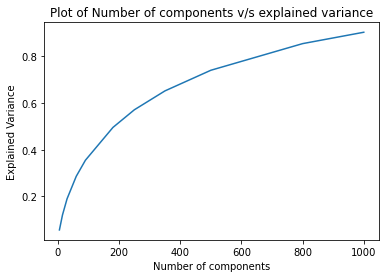

In [27]:
plt.plot(n_comp, explained)
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
plt.show()

#### SINGULAR-VALUE-DECOMPOSITION (SVD)

In [28]:
# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=800, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(doc_term_matrix)

TruncatedSVD(n_components=800, n_iter=100, random_state=122)

In [36]:
# print out some some topics of SVD model

terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    terms=[]
    for t in sorted_terms:
        terms.append(t[0])
    print("Topic "+str(i)+": ",terms)  

Topic 0:  ['attach', 'review', 'diff', 'patch', 'comment', 'http', 'file']
Topic 1:  ['attach', 'diff', 'comment', 'patch', 'file', 'http', 'review']
Topic 2:  ['diff', 'review', 'file', 'comment', 'http', 'attach', 'patch']
Topic 3:  ['review', 'http', 'diff', 'comment', 'attach', 'file', 'patch']
Topic 4:  ['diff', 'attach', 'patch', 'review', 'http', 'file', 'comment']
Topic 5:  ['patch', 'http', 'diff', 'file', 'review', 'attach', 'comment']
Topic 6:  ['diff', 'file', 'attach', 'comment', 'http', 'patch', 'review']
Topic 7:  ['attach', 'review', 'file', 'http', 'diff', 'comment', 'patch']
Topic 8:  ['file', 'review', 'diff', 'patch', 'attach', 'comment', 'http']
Topic 9:  ['patch', 'diff', 'file', 'attach', 'comment', 'http', 'review']
Topic 10:  ['diff', 'http', 'file', 'comment', 'attach', 'patch', 'review']
Topic 11:  ['review', 'patch', 'http', 'file', 'attach', 'comment', 'diff']
Topic 12:  ['diff', 'comment', 'patch', 'http', 'review', 'attach', 'file']
Topic 13:  ['http', 'a

Topic 748:  ['diff', 'file', 'attach', 'http', 'patch', 'review', 'comment']
Topic 749:  ['comment', 'review', 'patch', 'file', 'diff', 'http', 'attach']
Topic 750:  ['review', 'attach', 'file', 'comment', 'patch', 'diff', 'http']
Topic 751:  ['review', 'comment', 'file', 'patch', 'http', 'attach', 'diff']
Topic 752:  ['attach', 'review', 'http', 'diff', 'file', 'patch', 'comment']
Topic 753:  ['comment', 'attach', 'review', 'http', 'file', 'diff', 'patch']
Topic 754:  ['diff', 'review', 'patch', 'file', 'comment', 'attach', 'http']
Topic 755:  ['file', 'review', 'patch', 'comment', 'http', 'attach', 'diff']
Topic 756:  ['review', 'attach', 'comment', 'diff', 'file', 'patch', 'http']
Topic 757:  ['patch', 'diff', 'http', 'review', 'file', 'comment', 'attach']
Topic 758:  ['attach', 'patch', 'http', 'comment', 'review', 'file', 'diff']
Topic 759:  ['patch', 'file', 'comment', 'review', 'diff', 'attach', 'http']
Topic 760:  ['attach', 'review', 'diff', 'http', 'comment', 'patch', 'file']

#### TOPICS VISUALIZATION

In [39]:
import umap.umap_ as umap

In [54]:
topics = svd_model.fit_transform(doc_term_matrix)

In [41]:
#
# embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(topics)
# plt.figure(figsize=(7,5))
# plt.scatter(embedding[:, 0], embedding[:, 1], 
# c=20,
# s = 10, # size
# edgecolor='none'
# )
# plt.show()